In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.preprocessing import TransactionEncoder

plt.style.use("seaborn-v0_8")

In [2]:
df = pd.read_csv("OnlineRetail.csv", encoding="utf-8-sig")

print("Initial Shape:", df.shape)
df.head()
df.columns = df.columns.str.replace('ï»¿', '', regex=False)
print("Shape after removing special characters:", df.shape)

Initial Shape: (541909, 8)
Shape after removing special characters: (541909, 8)


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
# ==============================
# 3️⃣ DATA CLEANING (FINAL VERSION)
# ==============================


# Remove cancelled invoices (important for MBA)
df = df[~df["InvoiceNo"].astype(str).str.startswith("C")]

# Remove missing values in important columns
df = df.dropna(subset=["CustomerID", "Description"])

# Remove negative or zero quantities (returns)
df = df[df["Quantity"] > 0]

# Remove negative or zero price
df = df[df["UnitPrice"] > 0]

# Remove duplicates
df = df.drop_duplicates()

# Convert InvoiceDate to datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors="coerce")

# Remove rows where date conversion failed (safety)
df = df.dropna(subset=["InvoiceDate"])

# Clean Description column
df["Description"] = df["Description"].astype(str).str.strip()
df = df[df["Description"] != ""]

# Create NetSales column
df["NetSales"] = df["Quantity"] * df["UnitPrice"]

print("Shape after cleaning:", df.shape)
df.head()

Shape after cleaning: (392692, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,NetSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [5]:
# ----------------------------
# Step 0: Remove rare items
# ----------------------------

# Count how many invoices each item appears in
item_counts = df.groupby("Description")["InvoiceNo"].nunique()

# Keep only items that appear in at least 50 invoices (adjust as needed)
min_invoice_threshold = 50
frequent_items = item_counts[item_counts >= min_invoice_threshold].index.tolist()

# Filter dataframe
df = df[df["Description"].isin(frequent_items)]

print("Shape after removing rare items:", df.shape)

# Clean product descriptions for consistency
df["Description"] = df["Description"].astype(str).str.strip().str.upper()

Shape after removing rare items: (359511, 9)


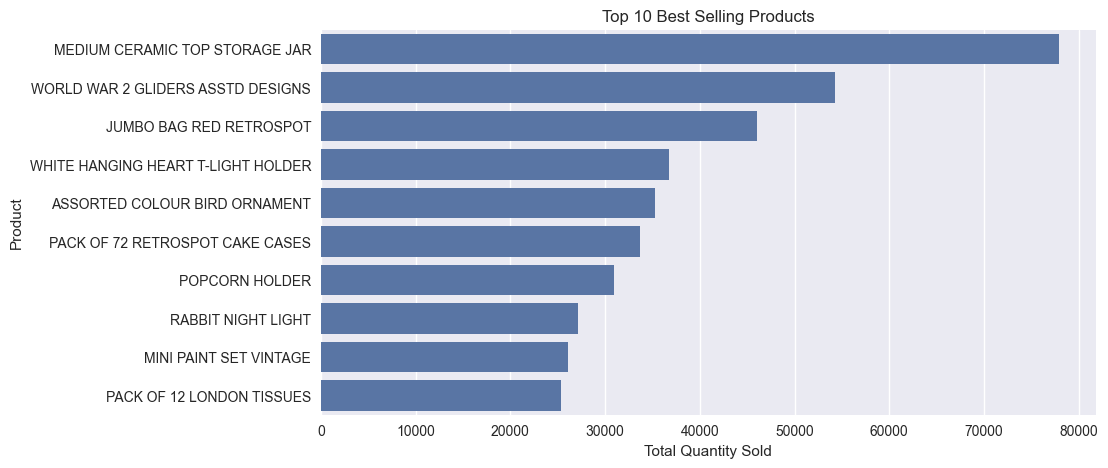

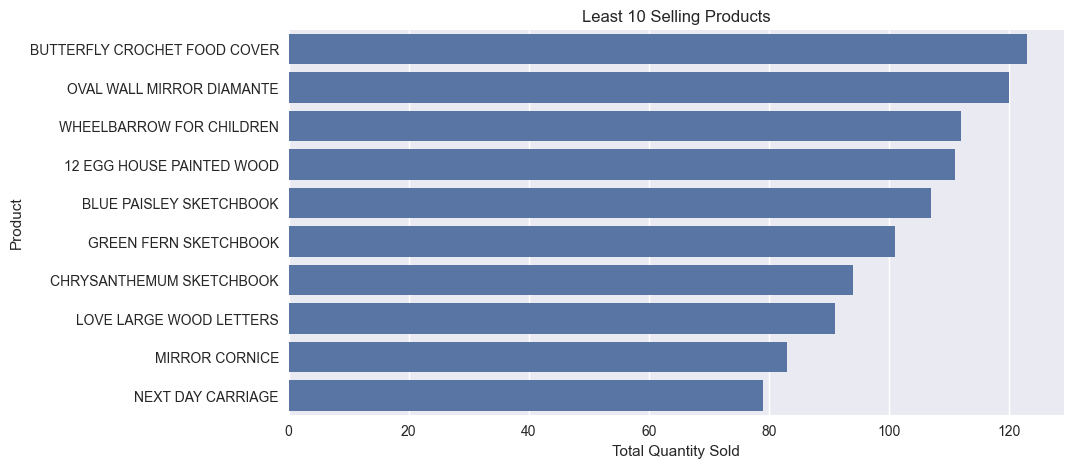

In [6]:
# ==============================
# 4️⃣ BEST & LEAST SELLING PRODUCTS
# ==============================

product_sales = (
    df.groupby("Description")["Quantity"]
    .sum()
    .sort_values(ascending=False)
)

# Top 10
top_10 = product_sales.head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_10.values, y=top_10.index)
plt.title("Top 10 Best Selling Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product")
plt.show()

# Bottom 10
bottom_10 = product_sales.tail(10)

plt.figure(figsize=(10,5))
sns.barplot(x=bottom_10.values, y=bottom_10.index)
plt.title("Least 10 Selling Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product")
plt.show()

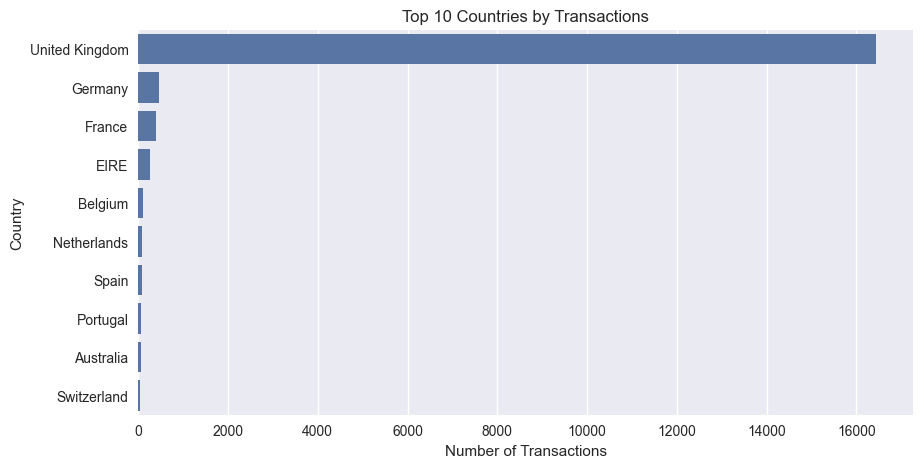

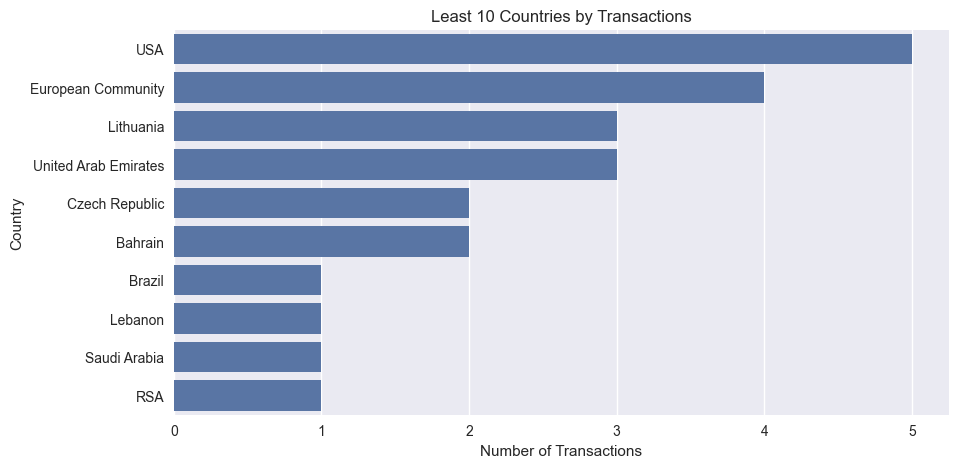

In [7]:
# ==============================
# 5️⃣ COUNTRIES WITH MOST & LEAST TRANSACTIONS
# ==============================

country_transactions = (
    df.groupby("Country")["InvoiceNo"]
    .nunique()
    .sort_values(ascending=False)
)

# Top Countries
top_countries = country_transactions.head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Transactions")
plt.xlabel("Number of Transactions")
plt.ylabel("Country")
plt.show()

# Least Countries
least_countries = country_transactions.tail(10)

plt.figure(figsize=(10,5))
sns.barplot(x=least_countries.values, y=least_countries.index)
plt.title("Least 10 Countries by Transactions")
plt.xlabel("Number of Transactions")
plt.ylabel("Country")
plt.show()

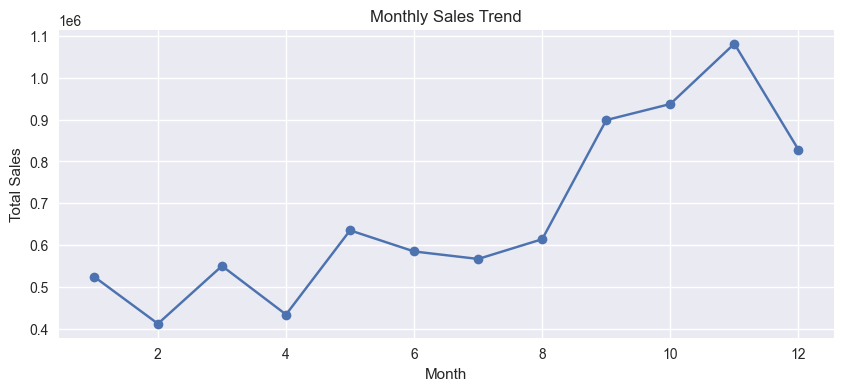

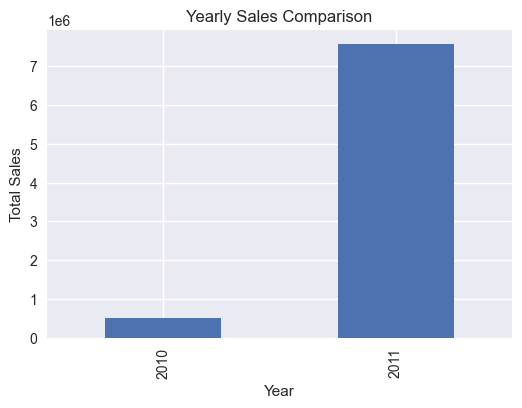

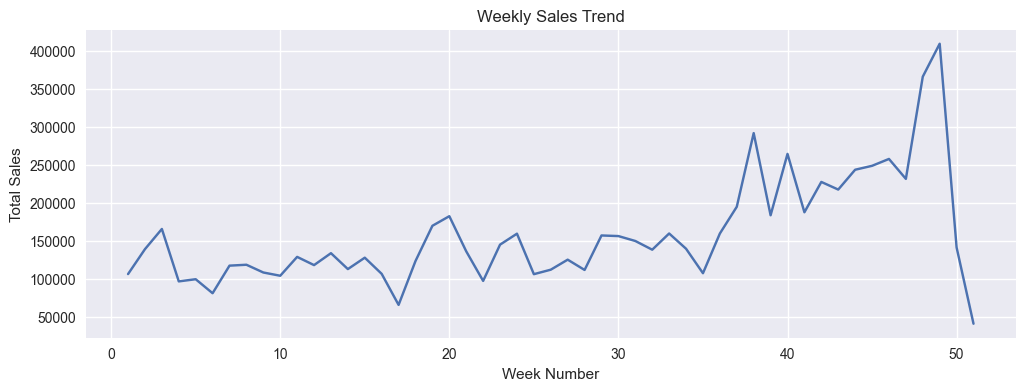

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'NetSales', 'Year', 'Month',
       'Week'],
      dtype='object')


In [8]:
# ==============================
# Ensure InvoiceDate is datetime
# ==============================

df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors="coerce")

# ==============================
# Create NetSales column
# ==============================

df["NetSales"] = df["Quantity"] * df["UnitPrice"]

# ==============================
# Extract Time Features
# ==============================

df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month
df["Week"] = df["InvoiceDate"].dt.isocalendar().week

# ==============================
# 📊 MONTHLY SALES
# ==============================

monthly_sales = df.groupby("Month")["NetSales"].sum().sort_index()

plt.figure(figsize=(10,4))
monthly_sales.plot(marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

# ==============================
# 📊 YEARLY SALES
# ==============================

yearly_sales = df.groupby("Year")["NetSales"].sum()

plt.figure(figsize=(6,4))
yearly_sales.plot(kind="bar")
plt.title("Yearly Sales Comparison")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()

# ==============================
# 📊 WEEKLY SALES
# ==============================

weekly_sales = df.groupby("Week")["NetSales"].sum().sort_index()

plt.figure(figsize=(12,4))
weekly_sales.plot()
plt.title("Weekly Sales Trend")
plt.xlabel("Week Number")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

print(df.columns)

In [9]:
# Make sure Description is clean: no extra spaces, uppercase
df["Description"] = df["Description"].astype(str).str.strip().str.upper()

# Group by InvoiceNo to get list of items per transaction
transactions = df.groupby("InvoiceNo")["Description"].apply(list).tolist()


transactions = (
    df.groupby("InvoiceNo")["Description"]
      .apply(lambda x: [str(item) for item in x if pd.notnull(item)])
      .tolist()
)

from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)

encoded_df = pd.DataFrame(te_array, columns=te.columns_)
print("Encoded Shape:", encoded_df.shape)
encoded_df.head()

Encoded Shape: (18321, 1817)


,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,...,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART FLOWER T-LIGHT HOLDER,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
print(type(encoded_df))

<class 'pandas.core.frame.DataFrame'>


In [11]:
from mlxtend.frequent_patterns import apriori, association_rules

# STEP 1: Generate frequent itemsets
frequent_itemsets = apriori(
    encoded_df,
    min_support=0.01,   # reduce if empty
    use_colnames=True
)

print("Frequent Itemsets Shape:", frequent_itemsets.shape)
frequent_itemsets.head()

Frequent Itemsets Shape: (990, 2)


,support,itemsets
0,0.013209,(10 COLOUR SPACEBOY PEN)
1,0.010207,(12 MESSAGE CARDS WITH ENVELOPES)
2,0.015065,(12 PENCIL SMALL TUBE WOODLAND)
3,0.016757,(12 PENCILS SMALL TUBE RED RETROSPOT)
4,0.015883,(12 PENCILS SMALL TUBE SKULL)


In [12]:
# STEP 2: Generate association rules
rules = association_rules(
    frequent_itemsets,
    metric="lift",
    min_threshold=0.1   # reduce if empty
)

rules = rules.sort_values(
    by=["lift", "confidence"],
    ascending=False
)

print("Rules Shape:", rules.shape)
rules.head()

print("Number of rules:", len(rules))

Rules Shape: (978, 14)
Number of rules: 978


In [13]:
# STEP 3: Save rules
rules.to_csv("association_rules.csv", index=False)

print("✅ association_rules.csv saved successfully!")

✅ association_rules.csv saved successfully!


In [14]:
df.to_csv("cleaned_data.csv", index=False)

print("✅ cleaned_data.csv saved successfully!")

✅ cleaned_data.csv saved successfully!


In [15]:
rules = pd.read_csv("association_rules.csv")
print("Number of rules:", len(rules))

Number of rules: 978
